In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:09<00:00, 177MB/s]
100% 1.06G/1.06G [00:09<00:00, 125MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization,Dropout

In [ ]:
# generatorss[Divides data into Batches]
train_ds= tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

validation_ds =  tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
# Function is to convert all pixel values b/w 0 to 1
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process) 

In [ ]:
# Creating CNN Model
# 3 convolution layers; 1st Layer = 32 filters, 2nd Layer = 64 filters, 3rd Layer = 128 filters
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding ='valid', activation= 'relu', input_shape=(256,256,3))) #convolution layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')) # Pooling

model.add(Conv2D(64,kernel_size=(3,3), padding ='valid', activation= 'relu')) #convolution layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')) # Pooling

model.add(Conv2D(128,kernel_size=(3,3), padding ='valid', activation= 'relu')) #convolution layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')) # Pooling

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 118ms/step - loss: 0.1996 - accuracy: 0.8895 - val_loss: 0.5079 - val_accuracy: 0.8252
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1827 - accuracy: 0.8974 - val_loss: 0.6754 - val_accuracy: 0.7930
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1652 - accuracy: 0.9092 - val_loss: 0.4424 - val_accuracy: 0.8288
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1513 - accuracy: 0.9111 - val_loss: 0.5400 - val_accuracy: 0.8294
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.1597 - accuracy: 0.9099 - val_loss: 0.6436 - val_accuracy: 0.8234
Epoch 6/10
625/625 [==============================] - 66s 104ms/step - loss: 0.1449 - accuracy: 0.9176 - val_loss: 1.0092 - val_accuracy: 0.8154
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.1398 - accuracy: 0.9206 - val_loss: 0.6398 - val_ac

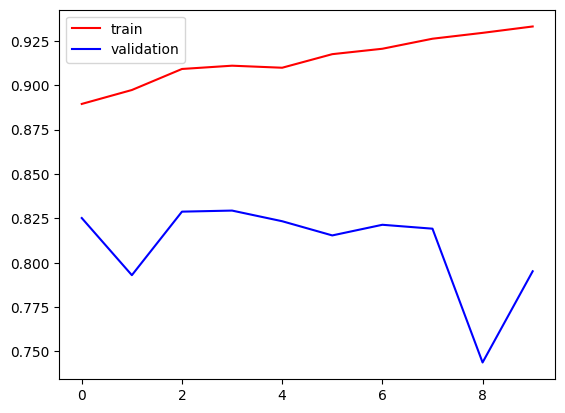

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

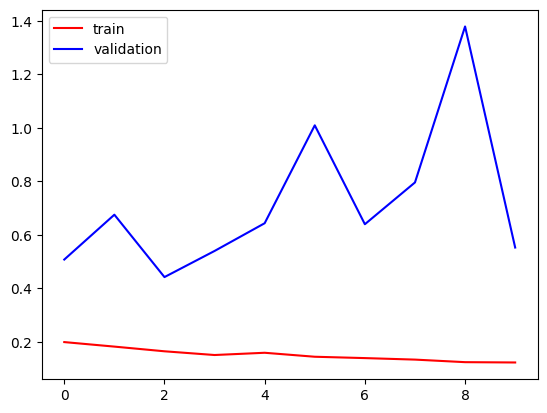

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/golden-retriever-puppy.jpg')

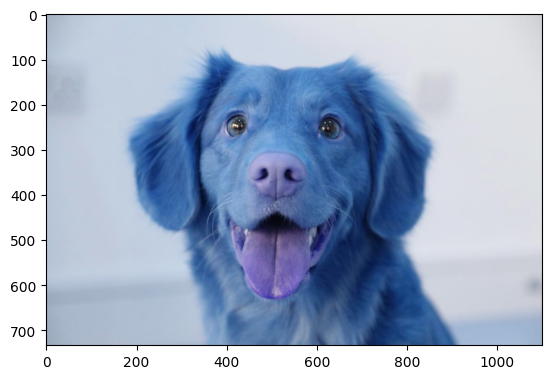

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(734, 1100, 3)

In [ ]:
test_img= cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
catto_or_doggo=model.predict(test_input)

1/1 [==============================] - 0s 263ms/step


In [ ]:
if catto_or_doggo == 1:
  print('This is a Dog')
else:
  print('This is a Cat')

This is a Dog


1/1 [==============================] - 0s 20ms/step


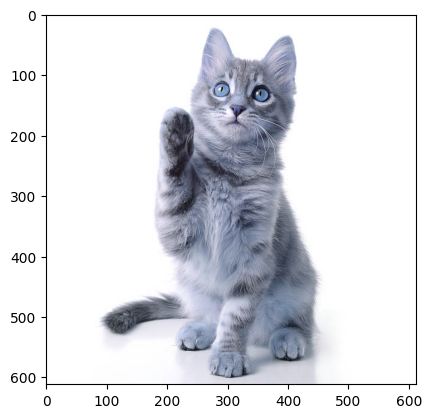

In [ ]:
test_img = cv2.imread('/content/istockphoto-459970595-612x612.jpg')
plt.imshow(test_img)
test_img.shape
test_img= cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
catto_or_doggo=model.predict(test_input)


In [ ]:
if catto_or_doggo == 1:
  print('This is a Dog')
else:
  print('This is a Cat')

This is a Cat
